## Forth-order Runge-Kutta method

$$k_1=hf(x_n,y_n)$$
$$k_2=hf(x_n+\frac{h}{2},y_n+\frac{k_1}{2})$$ 
$$k_3=hf(x_n+\frac{h}{2},y_n+\frac{k_2}{2})$$ 
$$k_4=hf(x_n+h,y_n+k_3)$$ 
$$y_{n+1}=y_n+\frac{k_1}{6}+\frac{k_2}{3}+\frac{k_3}{3}+\frac{k_4}{6}+\mathcal{O}(h^5)$$

truncation error:  
step doubling
$$y(x+2h)=y_1+(2h)^5\phi+\mathcal{O}(h^6)+\cdots$$
$$y(x+2h)=y_2+2(h)^5\phi+\mathcal{O}(h^6)+\cdots$$
$$\Delta=y_2-y_1$$
$$y(x+2h)=y_2+\frac{\Delta}{15}+\mathcal{O}(h^6)$$
$$\Delta_0=h_1|\frac{\Delta_0}{\Delta_1}|^{0.2}$$

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, t, y, h):
    """
    Perform a single step of RK4 method.
    
    :param f: Function representing the ODE (dy/dt = f(t, y))
    :param t: Current time
    :param y: Current value of y
    :param h: Stepsize
    :return: The estimated value of y at t+h
    """
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    return y + k1/6 + k2/3 + k3/3 + k4/6

def adaptive_rk4(f, t0, y0, tf, h0, tol):
    """
    Adaptive stepsize control for RK4 method.
    
    :param f: Function representing the ODE (dy/dt = f(t, y))
    :param t0: Initial time
    :param y0: Initial value of y
    :param tf: Final time
    :param h0: Initial step size
    :param tol: Tolerance for adaptive stepsize
    :return: Time and y values as arrays
    """
    t = t0
    y = y0
    h = h0
    times = [t]
    ys = [y]

    while t < tf:
        y_step = rk4(f, t, y, h)
        y_double_step = rk4(f, t, y, h/2)
        y_double_step = rk4(f, t + h/2, y_double_step, h/2)

        #truncation error
        error = np.linalg.norm(y_double_step - y_step) / 15.0

        #stepsize control
        if error < tol:
            t += h
            y = y_double_step
            times.append(t)
            ys.append(y)
            h = h * min(2, (tol/error)**0.20)
        else:
            h = h * max(0.5, (tol/error)**0.20)
    
    return np.array(times), np.array(ys)

#Example:
def example(t, y):
    return -2 * y

#t = 0 ~ 10 initial value y0=1, initial step size = 0.1, tolerance = 1e-5
t_vals, y_vals = adaptive_rk4(example, 0, 1, 10, 0.1, 1e-5)

t_vals, y_vals


(array([ 0.        ,  0.1       ,  0.3       ,  0.53865344,  0.79772382,
         1.08305682,  1.39998953,  1.75583758,  2.1606134 ,  2.62850411,
         3.18042633,  3.84878138,  4.68700527,  5.79066519,  7.34975579,
         9.79294147, 14.08305552]),
 array([1.00000000e+00, 8.18730901e-01, 5.48815195e-01, 3.40518903e-01,
        2.02827128e-01, 1.14632119e-01, 6.08208154e-02, 2.98553507e-02,
        1.32907270e-02, 5.21656008e-03, 1.73212555e-03, 4.56818775e-04,
        8.66390836e-05, 1.02011961e-05, 7.48374576e-07, 2.65285434e-07,
        1.25093497e-05]))

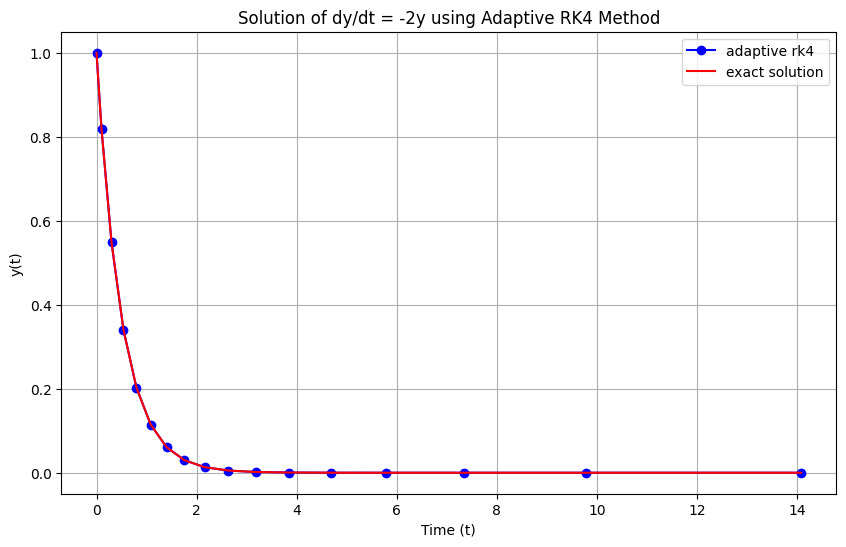

In [30]:
plt.figure(figsize = (10, 6))
plt.plot(t_vals, y_vals, marker = 'o', color ='b', label = 'adaptive rk4')
plt.plot(t_vals, np.exp(-2*t_vals), color = 'r', label = 'exact solution')
plt.title('Solution of dy/dt = -2y using Adaptive RK4 Method')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()